In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn, weight_ft_0, weight_ft_with_degree_meta, weighted_circular_coordinate
from dataset import noisy_knot

In [2]:
_ = noisy_knot()
data, coord = [_[el] for el in ['data', 'coord']]
prime = 47
eps = 1.2

In [3]:
fts = [None] + [
    weight_ft_with_degree_meta(ft)
    for ft in [lambda x, y: 1 / (np.sqrt(x * y)),
               lambda x, y: 1 / (x + y)]
] + [weight_ft_0(2)]
results = [weighted_circular_coordinate(data, prime=prime, cocycle_n=0, weight_ft=ft) for ft in tqdm(fts)]
labels = ['Original', '1/sqrt(D0 D1)', '1/(D0 + D1)', 'DGL']

100%|██████████| 4/4 [00:17<00:00,  4.43s/it]

0.13813183551089073


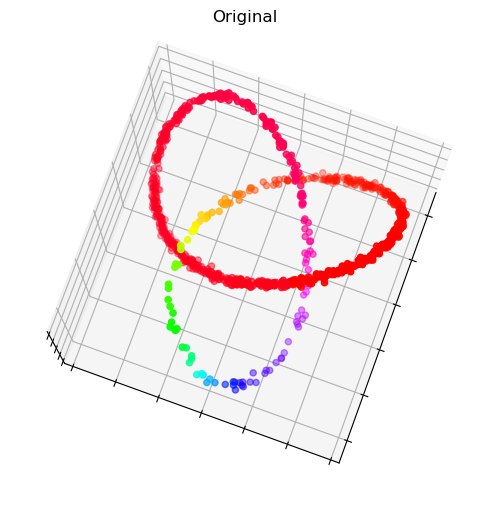

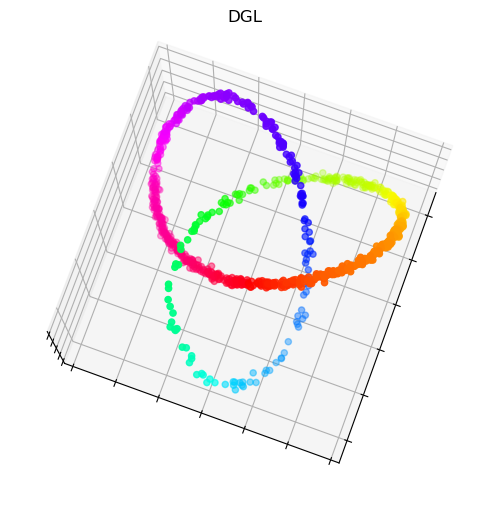

In [4]:
for i in [0, -1]:
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection='3d')
    ax.scatter(*data.T, c=results[i], cmap='hsv')
    ax.view_init(elev=80, azim=20)
    plt.tight_layout()
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    plt.title(labels[i])
    plt.show()
    plt.close()

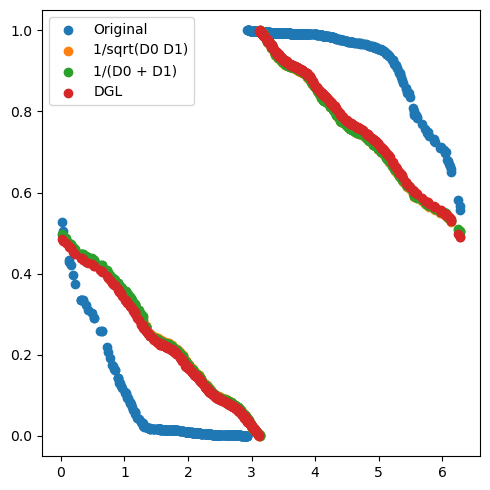

In [5]:
plt.figure(figsize=(5, 5))
for result, label in zip(results, labels):
    plt.scatter(coord, result, label=label)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [6]:
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
if eps is not None:
    ccl.eps=eps
ccl.cc_original()
ccl.f_reset_L2()
hyper_params = [
    {'epoch': 7000, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 7000, 'lr': 0.05, 'p_norm': 3},
    {'epoch': 7000, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 7000, 'lr': 0.01, 'p_norm': 5},
    {'epoch': 30000, 'lr': 0.01, 'p_norm': 6},
    {'epoch': 30000, 'lr': 0.01, 'p_norm': 10},
]
lp_results = []
for param in hyper_params:
    lp_results.append(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0])
lp_results.append(ccl.cc_Linf_Lp(30000, 0.0001, 0.001, 10, 25)[0])
lp_results = np.mod(np.asarray(lp_results), 1.0)

100%|██████████| 30000/30000 [06:11<00:00, 80.84it/s, 0.03733 / 0.03733 / p = infty]                   


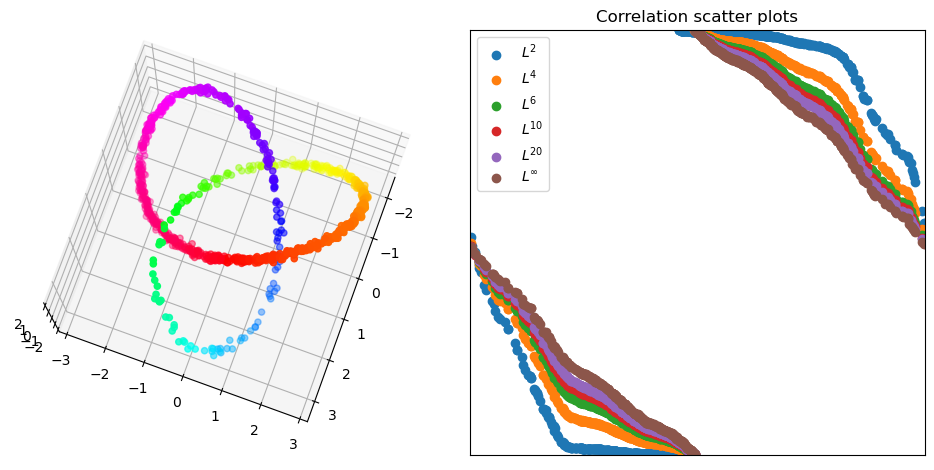

In [7]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(*data.T, c=lp_results[-1], cmap='hsv')
ax.view_init(elev=80, azim=20)
ax = fig.add_subplot(1, 2, 2)
for result, label in zip(lp_results, [2, 4, 6, '{10}', '{20}', '\infty']):
    ax.scatter(coord, result, label=f"$L^{label}$")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(0, 1)
plt.legend()
ax.set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()


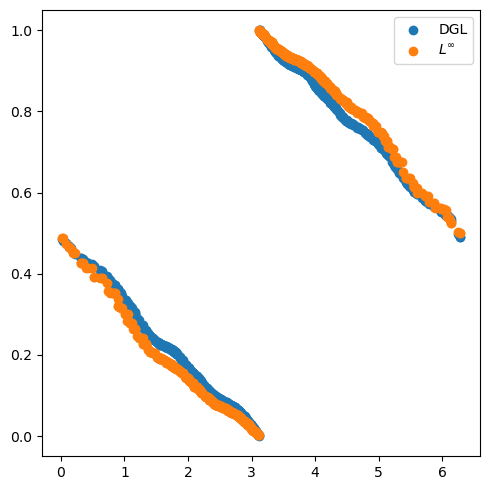

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(coord, results[-1], label=labels[-1])
plt.scatter(coord, lp_results[-1], label="$L^\infty$")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()